**Problem Definition**

Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

**Data dictionary**



1.   age - age in years
2.   sex - (M = male; F = female)
3.   ChestPainType  - chest pain type

    TA:   Typical angina: chest pain related decrease blood supply to the heart

    ATA:   Atypical angina: chest pain not related to heart

    NAP:   Non-anginal pain: typically esophageal spasms (non heart related)
    
    ASY:   Asymptomatic: chest pain not showing signs of disease


4.  RestingBP - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5.  Cholesterol - serum cholesterol in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6.  FastingBS  - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7.  RestingECG  - resting electrocardiographic results

  Normal: Nothing to note

  ST: ST-T Wave abnormality can range from mild symptoms to severe problems
signals non-normal heart beat.

  LVH: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
8.  MaxHR - maximum heart rate achieved
9.  ExerciseAngina - exercise induced angina (Y = yes; N = no)
10.  Oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11.  ST_Slope  - the slope of the peak exercise ST segment

  Up: Upsloping: better heart rate with excercise (uncommon)

  Flat: Flatsloping: minimal change (typical healthy heart)

  Down: Downslopins: signs of unhealthy heart
12.  HeartDisease  - have disease or not (1=yes, 0=no) (= the predicted attribute or Target)


### **Import and Explore the Data**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import seaborn as sns 
import math
sns.set()

In [ ]:
from google.colab import drive
mount_path = '/content/drive/'
drive.mount(mount_path)
file_path = 'My Drive/python_for_data_scientists/capstone_one/heart.csv'
df = pd.read_csv(mount_path + file_path)

Mounted at /content/drive/


In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

Here we have 918 Rows with 12 variable.

### **Cleaning the Data**

**Data Types**



1.   Binary: FastingBP, HeartDisease
2.   Categorical: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
3.   Continuous: Age, RestingBP, Cholestrerol, MaxHR, Oldpeak



Getting to know dataset, datatypes and values

In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
#Checking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Checking for dublicates
dublicated = df.duplicated().sum()
if dublicated:
  print('Dublicated values in datesets are : {}'.format(dublicated))
else:
  print('The dataset contains no dublicate values')

The dataset contains no dublicate values


In [ ]:
#Checking if the dataset is balanced 
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
#Statistical summary
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


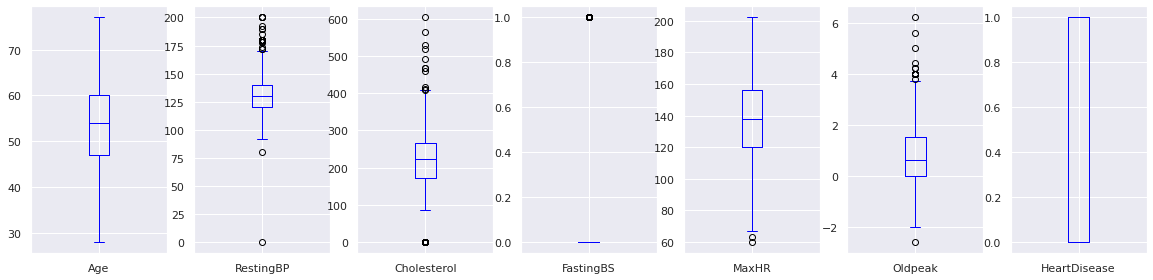

In [ ]:
#Checking for outliers
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

Note:


1.   There is no missing value or null. However we can see some outliers in Cholesterol variable. 
2.   The dataset contains no dublicate values.
3.   The dataset contains 508 patients with Heart disease and 410 patients without heartdisease. Hence dataset is balanced.



### **Distribution and Correlation**

# **Categorical variables**

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

1.  Target variable(Heart Disease) distribution

1    508
0    410
Name: HeartDisease, dtype: int64


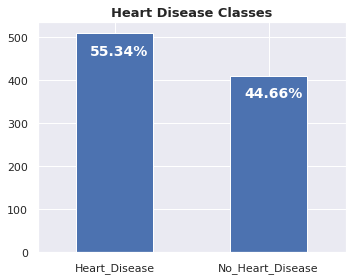

In [ ]:
print(df.HeartDisease.value_counts())

# Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Heart_Disease", "No_Heart_Disease"]
ax = df.HeartDisease.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

2. Dependance of Heart Disease on Gender 

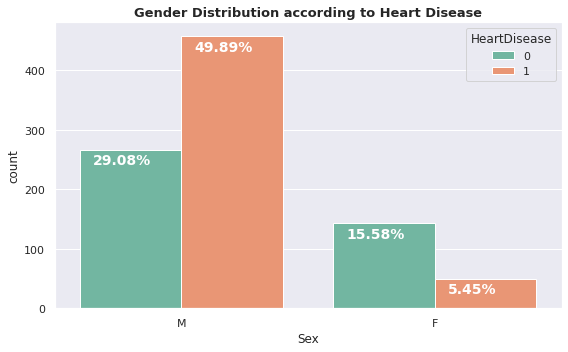

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['Sex']
ax = sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Gender Distribution according to Heart Disease", fontsize = 13, weight = 'bold')


totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-25,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

3.  Dependence of Heart Disease on Chest Pain Type

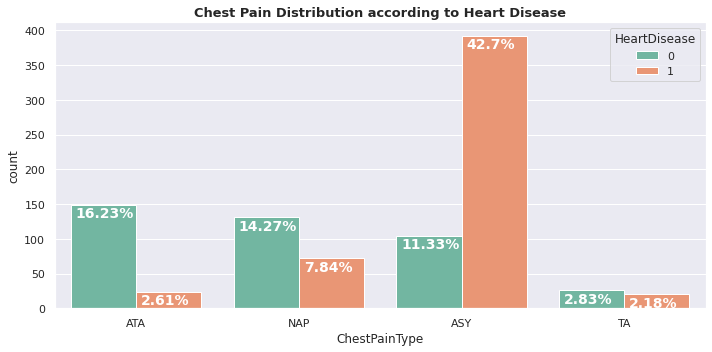

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ChestPainType']
ax = sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Heart Disease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-18,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

4.  Dependence of Heart Disease on Fasting Blood Sugar

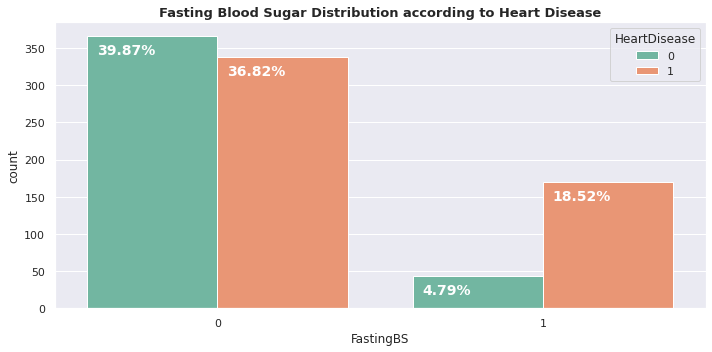

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['FastingBS']
ax = sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Fasting Blood Sugar Distribution according to Heart Disease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-25,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

5. Dependence of Heart Disease on Resting ECG

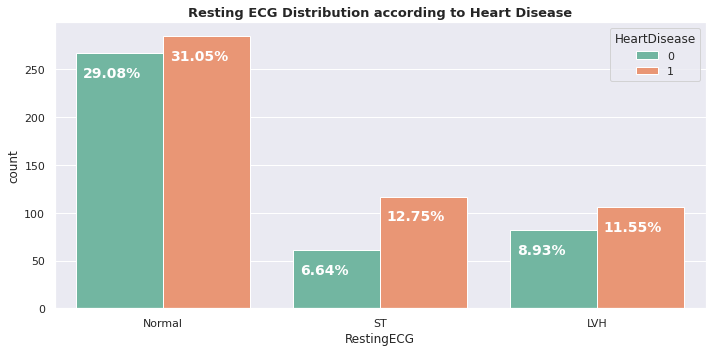

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['RestingECG']
ax = sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Resting ECG Distribution according to Heart Disease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-25,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

6. Dependence of Heart Disease on  Exercise Angina

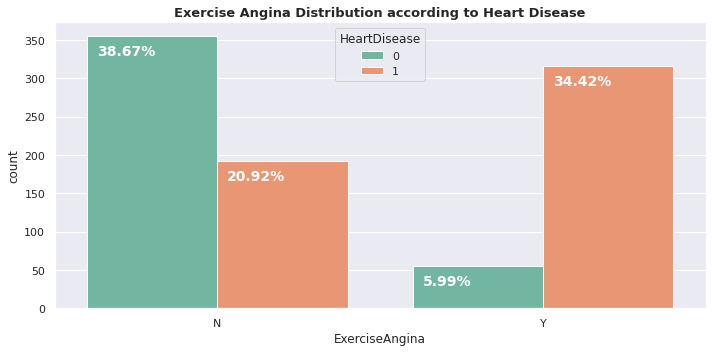

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ExerciseAngina']
ax = sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("Exercise Angina Distribution according to Heart Disease", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-25,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

7. Dependence of Heart Disease on ST Slope

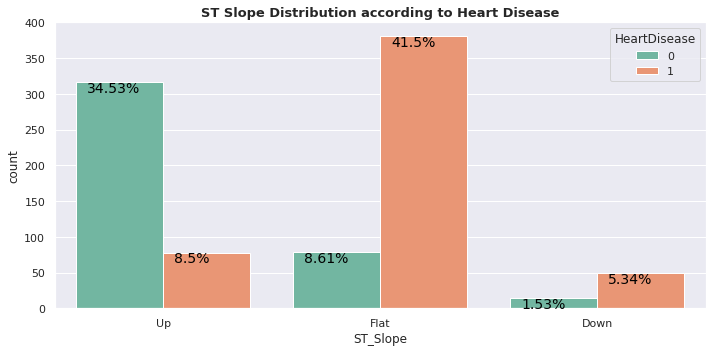

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['ST_Slope']
ax = sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, palette='Set2')
ax.set_title("ST Slope Distribution according to Heart Disease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-14,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black')  
plt.tight_layout()

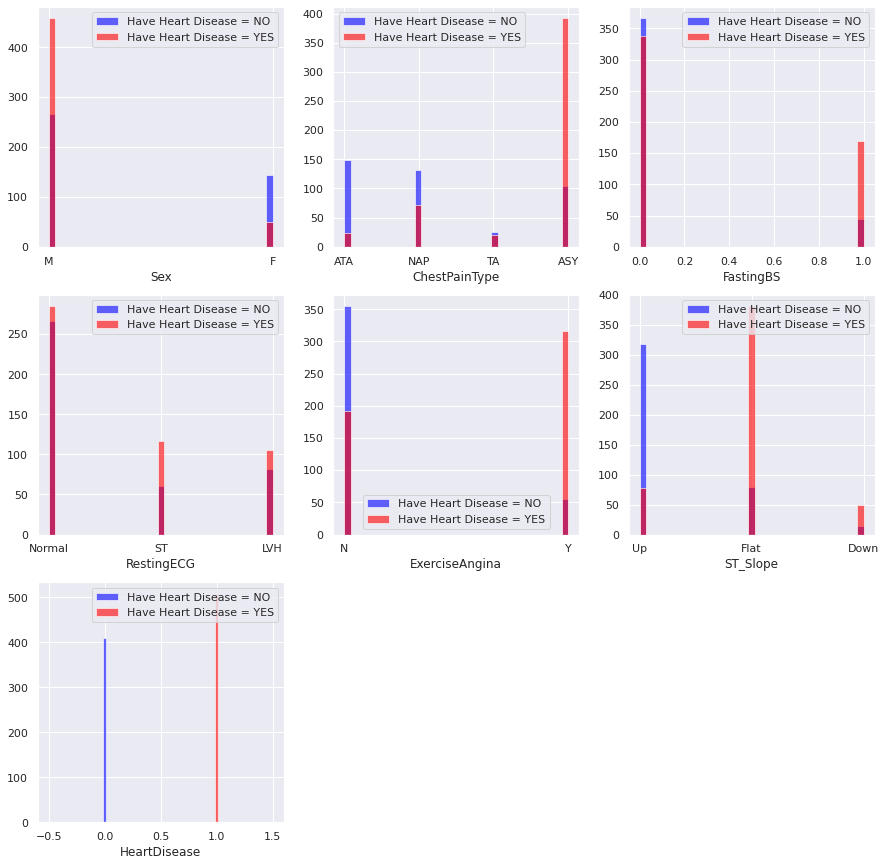

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# **Note:**

From the histograms we can see that, 

1.   There are more patients with Heart Disease than healthy ones. 
2.   There is a clear gender dependance. There are more male patients than female with heart disease.
3.   Chest pain or angina is a type of discomfort caused when heart muscle doesn’t receive enough oxygen rich blood, which triggered discomfort in arms, shoulders, neck, etc. Chest Pain of types ATA, NAP, TA observed more for healthy patients than one with Heart Disease. Where as Chest Pain of type ASY are observed more for patients with Heart Disease. Hence we can say that patients with Chest pain of type ASY have higher chanses of Heart Disease, as compared to other types.
4.   Fasting blood sugar or FastingBS is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patients without diabetes. This provides a hint that FastingBS might not be a strong indicator for heart disease.
5.   Resting electrocardiographic or RestingECG graph is simplest and fastest test used to evaluate the heart functioning. We observe that there are more number of patients with the Heart Disease having normal RestingECG as compared to ST and LVH. Nonetheless higher number of people with seen with all Resting ECG types have heart disease.
6.  Our dataset has more patients with no Exercise Angina than with Exercise Angina. However there is very high number of Patients with Exercise Angina are have Heart Disease. So we can conclude that presense of Exercise Angina can be a indicator of Heart Disease.
7.  Patients with ST Slope Flat and Down are more likely to have Heart Disease than the patients with the ST Slope up. 



### **Continuous variables**

In [ ]:
continous_val

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

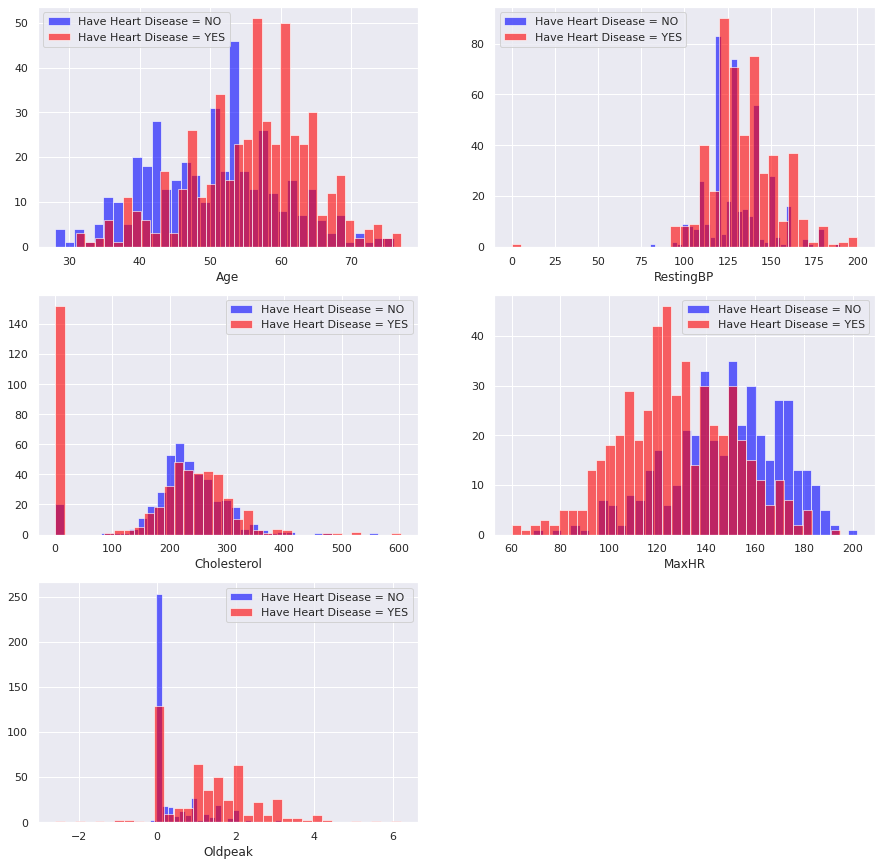

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# **Note:**

From the histogram we observe that,
1.   Age shows normal distribution. Heart Disease is seen higher on aged patients than young ones.
2.   RestingBP : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern. Patients with Heart Disease have higher Resting BP.
3.   cholestorel {serum cholestoral in mg/dl} : above 200 is cause for concern.
4.   oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more



# **Age vs. Max Heart Rate for with and w/o Heart Disease**

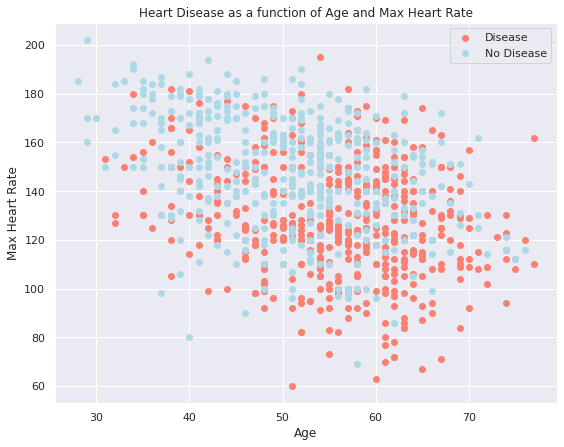

In [ ]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.Age[df.HeartDisease==1],
            df.MaxHR[df.HeartDisease==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.HeartDisease==0],
            df.MaxHR[df.HeartDisease==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Note:

We scatter plot clearly reflect that Heart disease are less seen in patients who are younger and have higher heartbeat compared to older with lower heartbeat.

## **T - testing and statistical analysis**

1. Dependance of Heart Disease on Age

In [ ]:
#Seaparating patients with and eithout Heart Disease
age_positive = df['Age'][df['HeartDisease']==1]
age_negative = df['Age'][df['HeartDisease']==0]

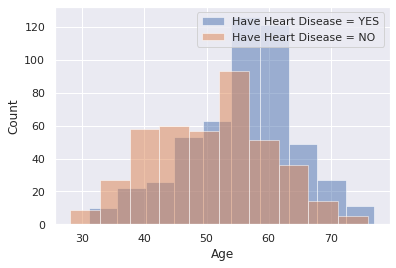

In [ ]:
#Plotting histogram
plt.hist(age_positive, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(age_negative, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#statistical summary
print(stats.describe(age_positive))
print(stats.describe(age_negative))

DescribeResult(nobs=508, minmax=(31, 77), mean=55.8996062992126, variance=76.16149885850066, skewness=-0.37749990593767635, kurtosis=-0.004463366097507304)
DescribeResult(nobs=410, minmax=(28, 76), mean=50.551219512195125, variance=89.20641660206334, skewness=0.08011156928221834, kurtosis=-0.41803941820473645)


In [ ]:
#Performing T-Test
stats.ttest_ind(age_positive, age_negative)

Ttest_indResult(statistic=8.897234373161165, pvalue=3.0079532400497047e-18)

In [ ]:
#Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(age_positive, age_negative)

'The difference in means at the 95% confidence interval (two-tail) is between 4.160198581224889 and 6.536574992810061.'

## **Note:**

1. From both the histograms and the statistical meassures, it appears that the distribution of samples of age variable with Heart Disease are more negatively-skewed as compared to that of age variable samples without Heart Disease. Mean of age is clearly higher for the patients with Heart Disease than the patients without. 
2. From t-test between age of the patients with and without heart disease reveals that, the test statistic is greater than 1.96 and the p-value is less than < .05. Hence we can safely reject the null hypothysis that means of those two are the same.
3.  By evaluating the 95% confidence interval for the difference in mean ages, we find that patients with Heart Disease have mean age about 4.16-6.53 years higher than patients without Heart Disease.

2. Dependance of Heart Disease on Resting Blood Pressure

In [ ]:
#Seaparating patients with and eithout Heart Disease
bp_positive = df['RestingBP'][df['HeartDisease']==1]
bp_negative = df['RestingBP'][df['HeartDisease']==0]

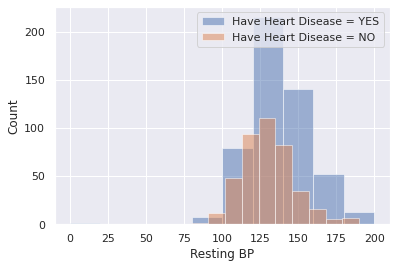

In [ ]:
#Plotting histogram
plt.hist(bp_positive, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(bp_negative, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Resting BP')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#statistical summary
print(stats.describe(bp_positive))
print(stats.describe(bp_negative))

DescribeResult(nobs=508, minmax=(0, 200), mean=134.18503937007873, variance=393.17673826274677, skewness=-0.08056757495243128, kurtosis=4.16789161028593)
DescribeResult(nobs=410, minmax=(80, 190), mean=130.18048780487806, variance=272.23629315999756, skewness=0.5638636065589477, kurtosis=0.8350069232930641)


In [ ]:
#Performing T-Test
stats.ttest_ind(bp_positive, bp_negative)

Ttest_indResult(statistic=3.2752447052283244, pvalue=0.0010953145851724372)

In [ ]:
#Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(bp_positive, bp_negative)

'The difference in means at the 95% confidence interval (two-tail) is between 1.654217406951735 and 6.354885723449607.'

## **Note:**

1. From both the histograms and the statistical meassures, it appears that the distribution of samples of Resting Blood Pressure variable with Heart Disease are more negatively-skewed as compared to that of Resting Blood Pressure variable samples without Heart Disease. Mean of Resting Blood Pressure is clearly higher for the patients with Heart Disease than the patients without. 
2. From t-test between Resting Blood Pressure of the patients with and without heart disease reveals that, the test statistic is greater than 1.96 and the p-value is less than < .05. Hence we can safely reject the null hypothysis that means of those two are the same.
3.  By evaluating the 95% confidence interval for the difference in means, we find that patients with Heart Disease have average Resting Blood Pressure levels between 1.65 - 6.35 higher than patients without Heart Disease.

3. Dependance of Heart Disease on Cholesterol

In [ ]:
#Seaparating patients with and eithout Heart Disease
chol_positive = df['Cholesterol'][df['HeartDisease']==1]
chol_negative = df['Cholesterol'][df['HeartDisease']==0]

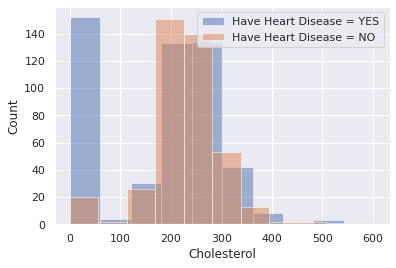

In [ ]:
#Plotting histogram
plt.hist(chol_positive, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(chol_negative, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

Plotting the histogram also led us to another benefit: spotting misleading values. The histogram has plotted some values of 0 cholesterol. This is a small selection of the data, so it is safe to simply drop it and proceed with the analysis.

In [ ]:
chol_positive_filtered = chol_positive[chol_positive != 0]
chol_negative_filtered = chol_negative[chol_negative != 0]

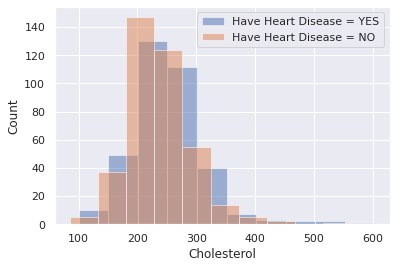

In [ ]:
#Plotting histogram
plt.hist(chol_positive_filtered, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(chol_negative_filtered, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#statistical summary
print(stats.describe(chol_positive_filtered))
print(stats.describe(chol_negative_filtered))

DescribeResult(nobs=356, minmax=(100, 603), mean=251.06179775280899, variance=3901.5905364772907, skewness=1.2515907135161661, kurtosis=4.661416762448786)
DescribeResult(nobs=390, minmax=(85, 564), mean=238.76923076923077, variance=3068.563575242239, skewness=1.160466431351959, kurtosis=3.9454967687998757)


In [ ]:
#Performing T-Test
stats.ttest_ind(chol_positive_filtered, chol_negative_filtered)

Ttest_indResult(statistic=2.8484821957405964, pvalue=0.004514069106741928)

In [ ]:
#Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(chol_positive_filtered, chol_negative_filtered)

'The difference in means at the 95% confidence interval (two-tail) is between 3.787965561728301 and 20.797168405428124.'

## **Note:**

1. From both the histograms and the statistical meassures, it appears that the distribution of samples of Cholesterol variable with Heart Disease are more postively-skewed as compared to that of Cholesterol variable samples without Heart Disease. Mean of Cholesterol is clearly higher for the patients with Heart Disease than the patients without. 
2. From t-test between Cholesterol of the patients with and without heart disease reveals that, the test statistic is greater than 1.96 and the p-value is less than < .05. Hence we can safely reject the null hypothysis that means of those two are the same.
3.  By evaluating the 95% confidence interval for the difference in means, we find that patients with Heart Disease have average Cholesterol levels between 3.78 - 20.79 higher than patients without Heart Disease.

4. Dependance of Heart Disease on Maximum Heartrate

In [ ]:
#Seaparating patients with and eithout Heart Disease
mhr_positive = df['MaxHR'][df['HeartDisease']==1]
mhr_negative = df['MaxHR'][df['HeartDisease']==0]

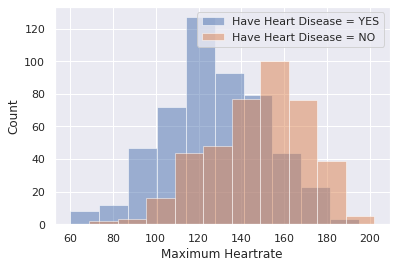

In [ ]:
#Plotting histogram
plt.hist(mhr_positive, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(mhr_negative, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Maximum Heartrate')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#statistical summary
print(stats.describe(mhr_positive))
print(stats.describe(mhr_negative))

DescribeResult(nobs=508, minmax=(60, 195), mean=127.65551181102362, variance=546.9481549643573, skewness=-0.0036283641036579796, kurtosis=-0.20609901811644882)
DescribeResult(nobs=410, minmax=(69, 202), mean=148.15121951219513, variance=542.3340449639215, skewness=-0.44525924171231346, kurtosis=-0.16612721040731948)


In [ ]:
#Performing T-Test
stats.ttest_ind(mhr_positive, mhr_negative)

Ttest_indResult(statistic=-13.22548998290478, pvalue=1.1377859840278095e-36)

In [ ]:
#Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(mhr_positive, mhr_negative)

'The difference in means at the 95% confidence interval (two-tail) is between -23.531769565856436 and -17.459645836486587.'

## **Note:**

1. From both the histograms and the statistical meassures, it appears that the distribution of samples of Maximum heartrate of patients with and without heartdisease are normally distributed. We clearly see that mean of Maximum heartrate is lower among the patients with heartdisease than without. 
 
2. From t-test between Maximum heartrate of the patients with and without heart disease reveals that, the test statistic is greater than 1.96 and the p-value is less than < .05. Hence we can safely reject the null hypothysis that means of those two are the same.
3.  By evaluating the 95% confidence interval for the difference in means, we find that patients with Heart Disease have average Meximum heartrate levels between 23.53-17.45 lower than patients without Heart Disease.

5.  Dependance of Heart Disease on Oldpeak

In [ ]:
#Seaparating patients with and eithout Heart Disease
op_positive = df['Oldpeak'][df['HeartDisease']==1]
op_negative = df['Oldpeak'][df['HeartDisease']==0]

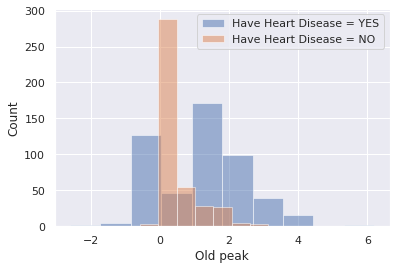

In [ ]:
#Plotting histogram
plt.hist(op_positive, alpha = .5, label = "Have Heart Disease = YES")
plt.hist(op_negative, alpha = .5, label = "Have Heart Disease = NO")
plt.xlabel('Old peak')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#statistical summary
print(stats.describe(op_positive))
print(stats.describe(op_negative))

DescribeResult(nobs=508, minmax=(-2.6, 6.2), mean=1.2742125984251969, variance=1.326809043470158, skewness=0.5103818877082369, kurtosis=0.6820796462771574)
DescribeResult(nobs=410, minmax=(-1.1, 4.2), mean=0.4080487804878049, variance=0.48959276045083183, skewness=1.8827170819870513, kurtosis=3.8252907437731443)


In [ ]:
#Performing T-Test
stats.ttest_ind(op_positive, op_negative)

Ttest_indResult(statistic=13.364696790867978, pvalue=2.3907724240589574e-37)

In [ ]:
#Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_1_mean - sample_2_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(op_positive, op_negative)

'The difference in means at the 95% confidence interval (two-tail) is between 0.7452466298726879 and 0.9870810060020967.'

#**Note:**

1. From both the histograms and the statistical meassures, it appears that the distribution of samples of Old peak variable without Heart Disease are more postively-skewed as compared to that of Old peak variable samples with Heart Disease. This means Old peak variable samples with Heart Disease follow a distribution closer to normal distribution. The kutosis reflects the supports this conclusion as well. Mean of Old peak is clearly higher for the patients with Heart Disease than the patients without. 
2. From t-test between Oldpeak of the patients with and without heart disease reveals that, the test statistic is greater than 1.96 and the p-value is less than < .05. Hence we can safely reject the null hypothysis that means of those two are the same.
3.  By evaluating the 95% confidence interval for the difference in means, we find that patients with Heart Disease have average Oldpeak levels between 0.74-0.98 higher than patients without Heart Disease.

### **Conclusion:**


From both the histograms and the statistical meassures for Cardiovascular disease(CVD) or Heartdisease prediction dataset of 918 rows with 12 medical parameter, the following observations are made;

1.  There are 55.34% patients have heart disease and rest 44.66% patients have no heart disease
2.  Heart disease are mostly seen in male patients than female.
3.  Patients with Asymptomatic(ASY) chest pain type have higher probability of having heart disease.
4.  Nearly 80% of the patients with higher fasting blood sugar level have heart disease. Hence elevated fasting blood sugar level can cause the risk of CVD's.
5.  Heart disease can be seen in patients who have Normal, ST and LVH type of resting ECG. Hence it is resting ECG alone may not be the strong indicatator of heart disease.
6.  Presence of Exercise indused Angena can be a strong indecator of CVD's.
7.  Older patients with lower maximum heartrate are more prone to Heart disease than younger patients.
8.  Paired-sample t-tests were conducted to determine the effect of Age, Resting Blood Pressure, Cholesterol, Maximum heartrate, Old peak in development of heart disease. The p-value derived from t-test suggested that, there was a significant difference in the means of two sets of data. This implies that they come form two different populations. Thus it hints that age, Resting Blood Pressure, Cholesterol, Maximum heartrate, Old peak are all important parameters in determining probability of heart diseases.

